## Loading dataset using Tensorflow

Found 34792 images belonging to 5 classes.


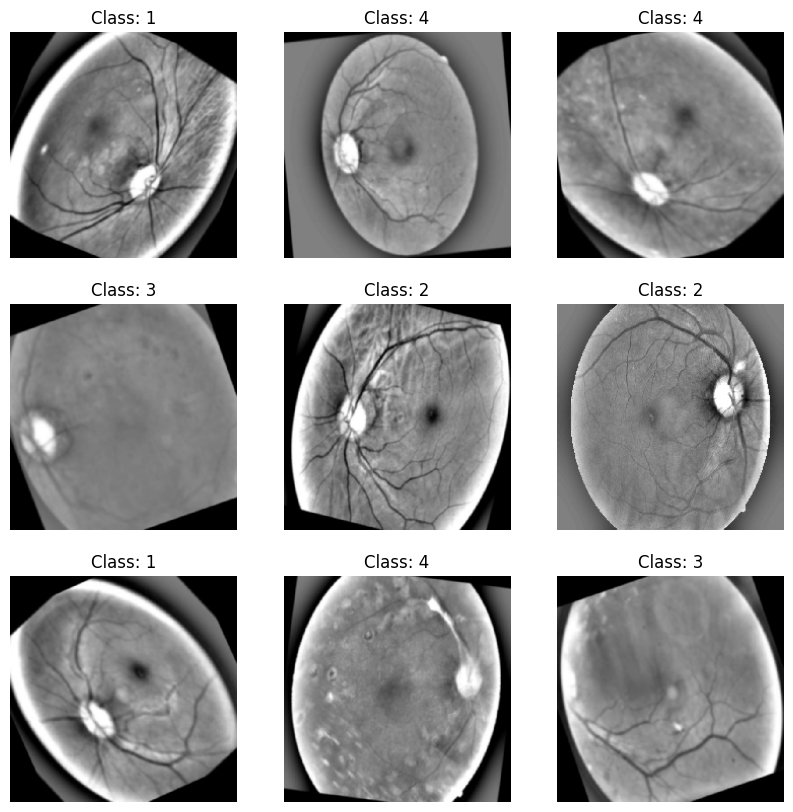

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths
train_dir = '/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train'

# Image dimensions
img_height, img_width = 224, 224

# Load the dataset without augmentation (for visualization)
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

# Get a batch of images and labels
images, labels = next(train_generator)

# Class indices
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[tf.argmax(labels[i])]}")
    plt.axis('off')
plt.show()

## Loading dataset using PyTorch

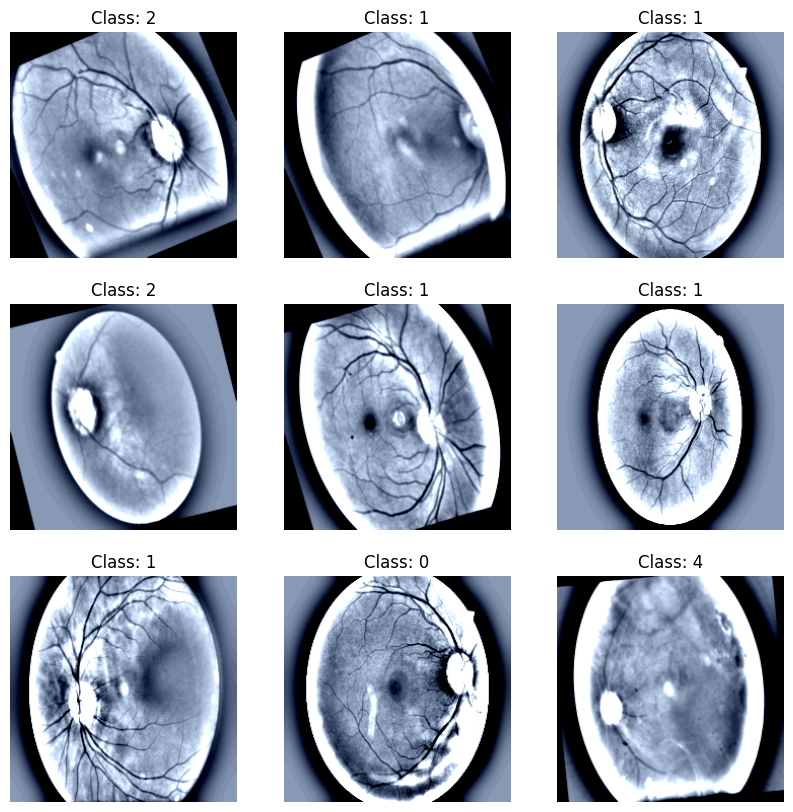

In [6]:
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define paths
train_dir = '/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train'

# Image transformations (only resizing and normalization for visualization)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Get a batch of images and labels
images, labels = next(iter(train_loader))

# Class indices
class_indices = train_dataset.class_to_idx
class_names = list(class_indices.keys())

# Function to reverse normalization for visualization
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    imshow(images[i])
    plt.title(f"Class: {class_names[labels[i]]}")
    plt.axis('off')
plt.show()

## Preprocessing 

In [10]:
from torchvision import transforms

# Define preprocessing and augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(20),  # Random rotation
    transforms.RandomResizedCrop(224),  # Random crop and resize
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Random contrast adjustment
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# For validation/test data, only apply resizing and normalization
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Using device: cpu
Classes: ['0', '1', '2', '3', '4']


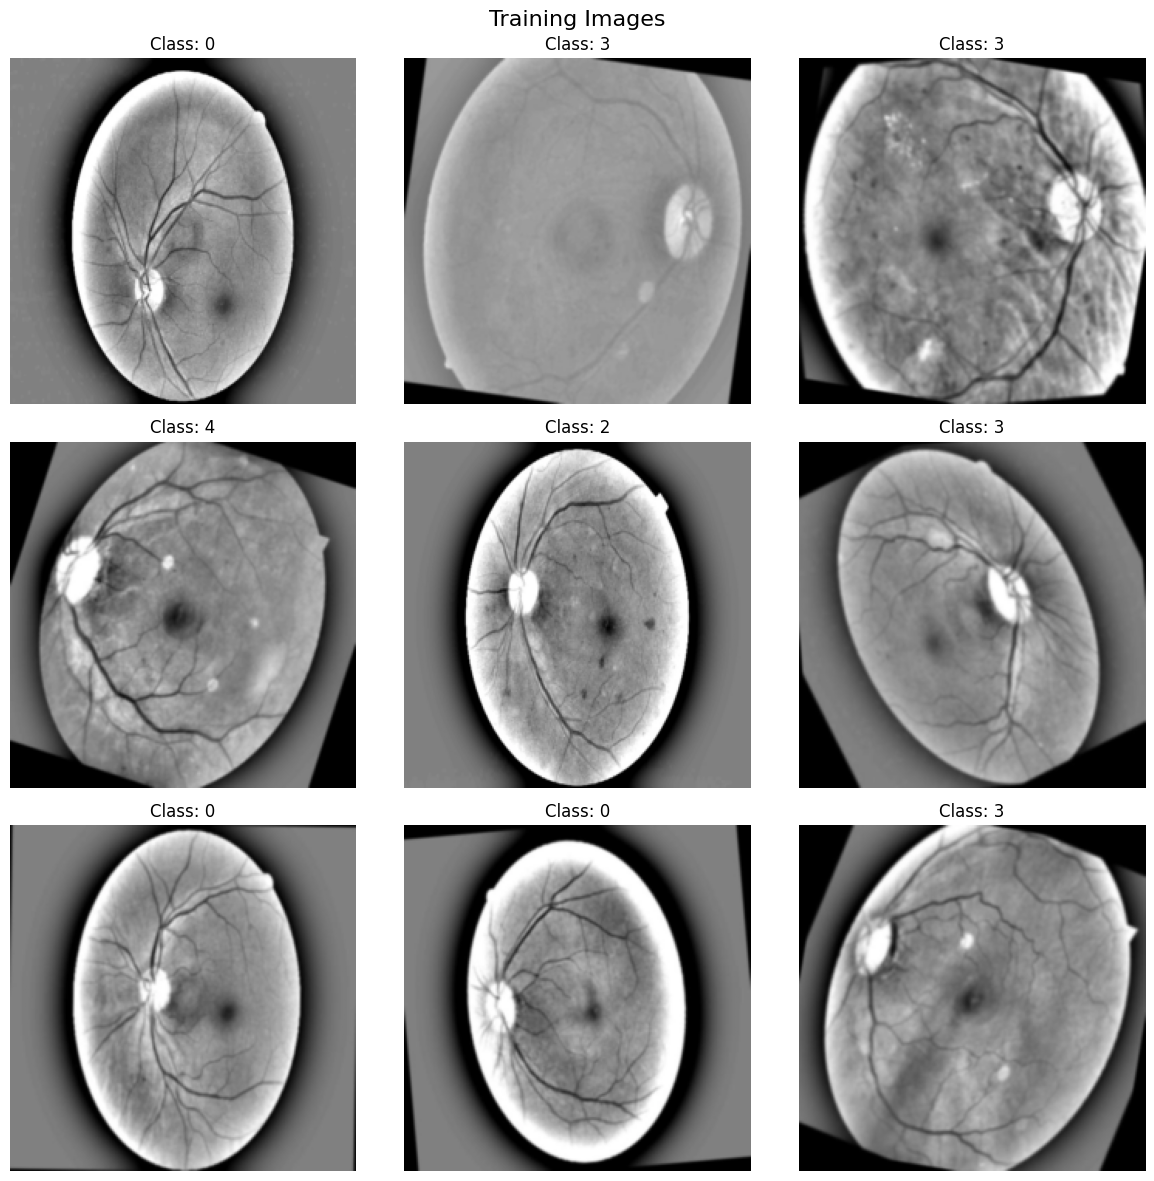

Epoch 1/15
----------
Train Loss: 1.3506 Acc: 0.3775
Val Loss: 1.2742 Acc: 0.4124

Epoch 2/15
----------
Train Loss: 1.2554 Acc: 0.4319
Val Loss: 1.2455 Acc: 0.4320

Epoch 3/15
----------
Train Loss: 1.1415 Acc: 0.4980
Val Loss: 1.6000 Acc: 0.3593

Epoch 4/15
----------
Train Loss: 0.9080 Acc: 0.6185
Val Loss: 2.1231 Acc: 0.3352

Epoch 5/15
----------
Train Loss: 0.5931 Acc: 0.7634
Val Loss: 3.3045 Acc: 0.3095

Epoch 6/15
----------
Train Loss: 0.3482 Acc: 0.8690
Val Loss: 2.2639 Acc: 0.4143

Epoch 7/15
----------
Train Loss: 0.2095 Acc: 0.9261
Val Loss: 3.0035 Acc: 0.4007

Epoch 8/15
----------
Train Loss: 0.1541 Acc: 0.9449
Val Loss: 2.8245 Acc: 0.3936

Epoch 9/15
----------
Train Loss: 0.0635 Acc: 0.9816
Val Loss: 2.4477 Acc: 0.4300

Epoch 10/15
----------
Train Loss: 0.0353 Acc: 0.9917
Val Loss: 2.5375 Acc: 0.4337

Epoch 11/15
----------
Train Loss: 0.0269 Acc: 0.9936
Val Loss: 2.6257 Acc: 0.4366

Epoch 12/15
----------
Train Loss: 0.0211 Acc: 0.9950
Val Loss: 2.6555 Acc: 0.4306

E

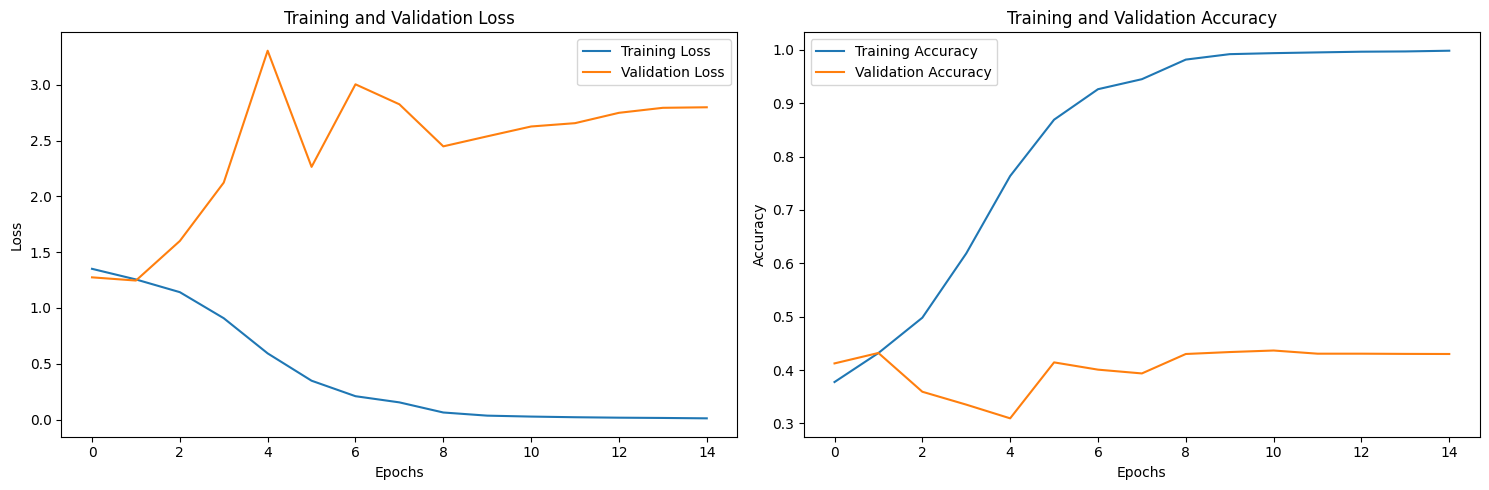

Validation Accuracy: 0.4300


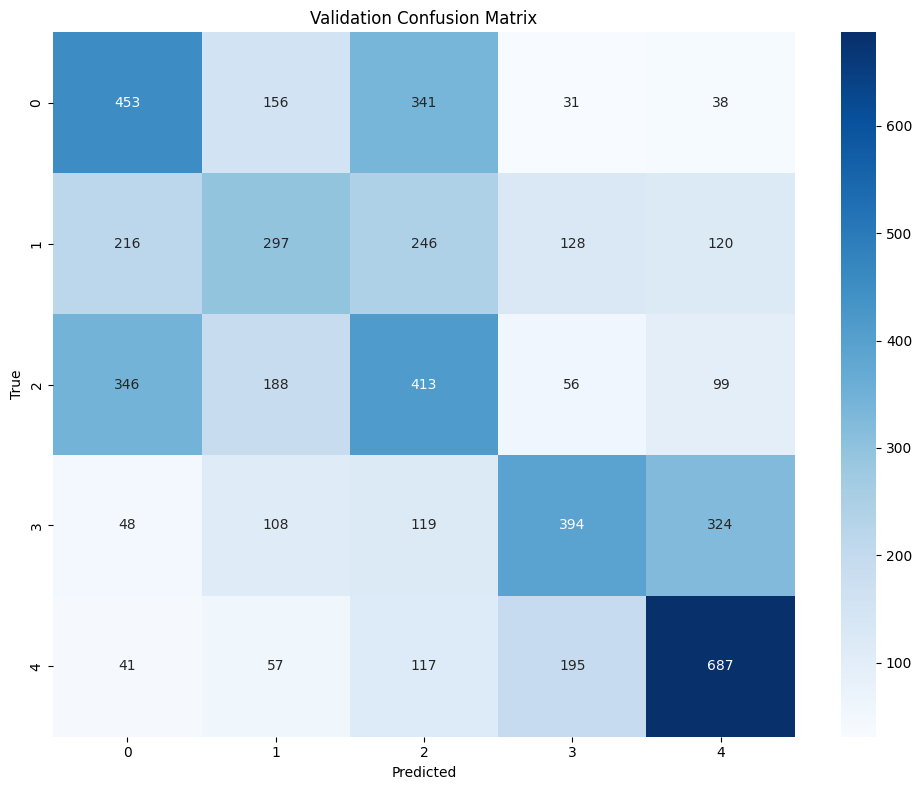


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.43      1019
           1       0.37      0.29      0.33      1007
           2       0.33      0.37      0.35      1102
           3       0.49      0.40      0.44       993
           4       0.54      0.63      0.58      1097

    accuracy                           0.43      5218
   macro avg       0.43      0.43      0.43      5218
weighted avg       0.43      0.43      0.43      5218

Test Accuracy: 0.4458


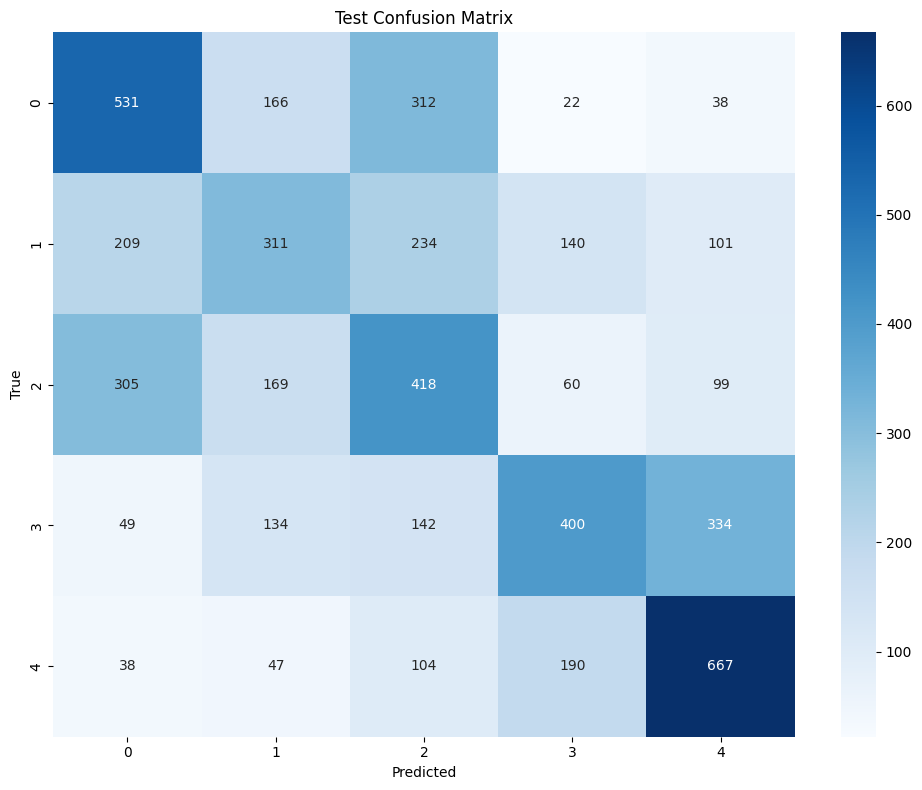


Test Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.48      1069
           1       0.38      0.31      0.34       995
           2       0.35      0.40      0.37      1051
           3       0.49      0.38      0.43      1059
           4       0.54      0.64      0.58      1046

    accuracy                           0.45      5220
   macro avg       0.44      0.44      0.44      5220
weighted avg       0.45      0.45      0.44      5220



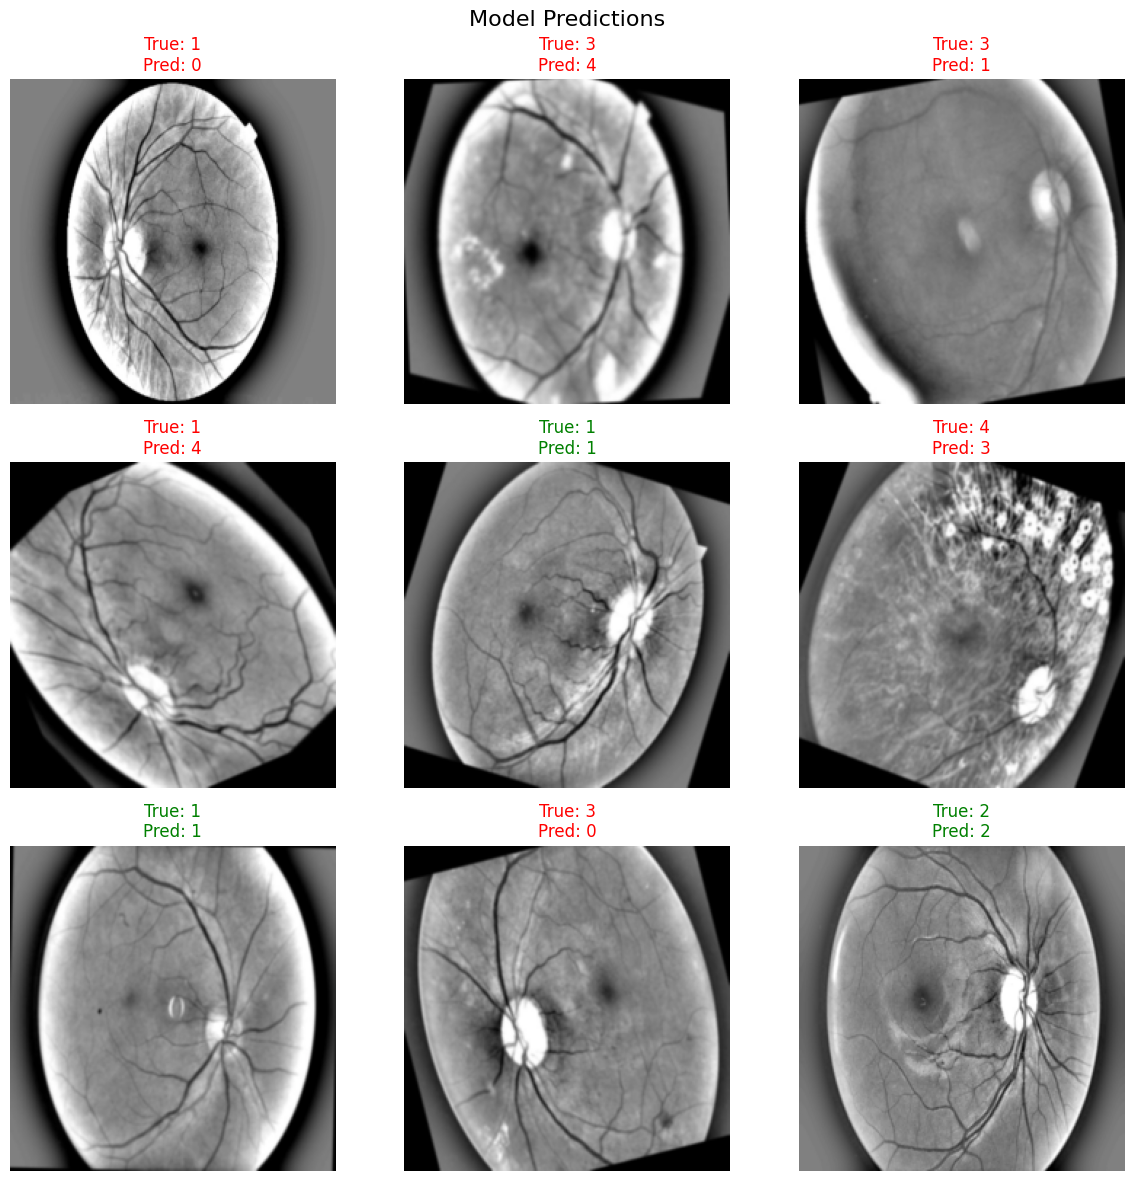

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import time
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define paths
train_dir = '/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train'

val_dir = '/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val'
test_dir = '/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test'

# Image transformations for training
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.RandomRotation(10),      # Data augmentation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Image transformations for validation/testing (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
full_dataset = datasets.ImageFolder(train_dir, transform=train_transform)

# Split the dataset into training, validation, and test sets
# 70% training, 15% validation, 15% test
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size]
)

# Apply the validation transform to validation and test datasets
val_dataset.dataset.transform = val_transform
test_dataset.dataset.transform = val_transform

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Get class names
class_indices = full_dataset.class_to_idx
class_names = list(class_indices.keys())
num_classes = len(class_names)
print(f"Classes: {class_names}")

# Function to properly unnormalize images for visualization
def unnormalize(img):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    img = img * std + mean  # Unnormalize
    return img

# Visualize a batch of images
def visualize_batch(dataloader, num_images=9, title="Sample Images"):
    images, labels = next(iter(dataloader))
    images = images[:num_images]
    labels = labels[:num_images]
    
    plt.figure(figsize=(12, 12))
    for i, (img, label) in enumerate(zip(images, labels)):
        img = unnormalize(img)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img.permute(1, 2, 0).numpy())
        plt.title(f"Class: {class_names[label]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize sample images from training set
visualize_batch(train_loader, title="Training Images")

# Define the CNN model
class RetinopathyCNN(nn.Module):
    def __init__(self, num_classes):
        super(RetinopathyCNN, self).__init__()
        # Use a pre-trained ResNet18 model
        self.model = models.resnet18(weights=None)
        
        # Freeze early layers to prevent overfitting
        for param in list(self.model.parameters())[:-20]:
            param.requires_grad = False
            
        # Replace the final fully connected layer
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Dropout(0.5),  # Add dropout for regularization
            nn.Linear(num_ftrs, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = RetinopathyCNN(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=15):
    since = time.time()
    
    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = val_loader
                
            running_loss = 0.0
            running_corrects = 0
            
            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # Zero the parameter gradients
                optimizer.zero_grad()
                
                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)
            
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accs.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accs.append(epoch_acc.item())
                # Update learning rate based on validation loss
                scheduler.step(epoch_loss)
            
            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # Deep copy the model if it's the best validation accuracy so far
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict().copy()
        
        print()
    
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    
    # Plot training and validation metrics
    plot_metrics(train_losses, val_losses, train_accs, val_accs)
    
    return model

# Function to plot training and validation metrics
def plot_metrics(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(15, 5))
    
    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Evaluation function
def evaluate_model(model, dataloader, phase="Test"):
    model.eval()
    
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
    
    # Calculate accuracy
    accuracy = np.mean(np.array(y_true) == np.array(y_pred))
    print(f"{phase} Accuracy: {accuracy:.4f}")
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{phase} Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print(f"\n{phase} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    return accuracy

# Visualization function for model predictions
def visualize_predictions(model, dataloader, num_images=9):
    model.eval()
    
    images, labels = next(iter(dataloader))
    images = images[:num_images].to(device)
    labels = labels[:num_images]
    
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
    
    # Move images back to CPU for visualization
    images = images.cpu()
    preds = preds.cpu().numpy()
    
    plt.figure(figsize=(12, 12))
    for i, (img, pred, label) in enumerate(zip(images, preds, labels)):
        img = unnormalize(img)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img.permute(1, 2, 0).numpy())
        color = "green" if pred == label else "red"
        plt.title(f"True: {class_names[label]}\nPred: {class_names[pred]}", color=color)
        plt.axis('off')
    plt.suptitle("Model Predictions", fontsize=16)
    plt.tight_layout()
    plt.show()

# Train the model
trained_model = train_model(model, criterion, optimizer, scheduler, num_epochs=15)

# Save the model
torch.save(trained_model.state_dict(), 'diabetic_retinopathy_model.pth')

# Evaluate on validation set
val_accuracy = evaluate_model(trained_model, val_loader, phase="Validation")

# Evaluate on test set
test_accuracy = evaluate_model(trained_model, test_loader, phase="Test")

# Visualize predictions
visualize_predictions(trained_model, test_loader)

# Function to make prediction on a single image
def predict_image(model, image_path):
    # Load and preprocess the image
    transform = val_transform
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
    
    # Apply transformations
    from PIL import Image
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, pred = torch.max(output, 1)
        prob = torch.nn.functional.softmax(output, dim=1)[0]
    
    # Print results
    predicted_class = class_names[pred.item()]
    print(f"Predicted class: {predicted_class}")
    print("Class probabilities:")
    for i, p in enumerate(prob):
        print(f"{class_names[i]}: {p.item():.4f}")
    
    return predicted_class, prob.cpu().numpy()

# Example of how to use the predict_image function (uncomment to use)
# predict_image(trained_model, "/path/to/your/test/image.jpg")

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, auc
import time

# Assuming these are defined elsewhere: model, val_loader, test_loader, class_names, device, num_classes

# Evaluation function
def evaluate_model(model, dataloader, phase="Test"):
    model.eval()
    
    start_time = time.time()
    y_true = []
    y_pred = []
    all_probs = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Assuming model returns multiple outputs, but we only need the first one (logits)
            outputs, *_ = model(inputs)  # Unpack the first output and ignore the rest
            _, preds = torch.max(outputs, 1)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    

    
    # Calculate metrics
    accuracy = np.mean(np.array(y_true) == np.array(y_pred))
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    
    # Time per image
    total_time = time.time() - start_time
    images_count = len(dataloader.dataset)
    time_per_image = total_time / images_count
    
    print(f"{phase} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Inference Time: {time_per_image*1000:.2f} ms per image")
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{phase} Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    # Plot ROC curves for multiclass
    plt.figure(figsize=(10, 8))
    all_probs = np.array(all_probs)
    y_true_binary = np.zeros((len(y_true), num_classes))
    for i in range(len(y_true)):
        y_true_binary[i, y_true[i]] = 1
    
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_binary[:, i], all_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{phase} ROC Curves')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print classification report
    print(f"\n{phase} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    return accuracy, f1, precision, recall, time_per_image

# Evaluation execution
if __name__ == "__main__":
    # Evaluate on validation set
    val_metrics = evaluate_model(model, val_loader, phase="Validation")
    
    # Evaluate on test set
    test_metrics = evaluate_model(model, test_loader, phase="Test")
    
    # Assuming ensemble is defined elsewhere; evaluate ensemble if available
    try:
        ensemble_metrics = evaluate_model(ensemble, test_loader, phase="Ensemble")
        
        # Print final summary of metrics for comparison
        print("\n==== FINAL PERFORMANCE SUMMARY ====")
        print(f"Base Model F1 Score: {test_metrics[1]:.4f}")
        print(f"Base Model Precision: {test_metrics[2]:.4f}")
        print(f"Base Model Recall: {test_metrics[3]:.4f}")
        print(f"Base Model Inference Time: {test_metrics[4]*1000:.2f} ms/image")
        print(f"Ensemble Model F1 Score: {ensemble_metrics[1]:.4f}")
        print(f"Ensemble Model Precision: {ensemble_metrics[2]:.4f}")
        print(f"Ensemble Model Recall: {ensemble_metrics[3]:.4f}")
        print(f"Ensemble Model Inference Time: {ensemble_metrics[4]*1000:.2f} ms/image")
    except NameError:
        print("\nEnsemble model not defined. Skipping ensemble evaluation.")
        print("\n==== FINAL PERFORMANCE SUMMARY ====")
        print(f"Base Model F1 Score: {test_metrics[1]:.4f}")
        print(f"Base Model Precision: {test_metrics[2]:.4f}")
        print(f"Base Model Recall: {test_metrics[3]:.4f}")
        print(f"Base Model Inference Time: {test_metrics[4]*1000:.2f} ms/image")

NameError: name 'model' is not defined